# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner.

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors.

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [2]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2
 
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule**

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation.

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**:
\begin{align}
  L(\theta) = \prod_{i=1}^m \big(h_\theta(x^{(i)})\big)^{y^{(i)}} \big(1 - h_\theta(x^{(i)})\big)^{1 - y^{(i)}}$
\end{align}


- **Log-Likelihood**:

\begin{align}
l(\theta) = \sum_{i=1}^m \Big[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log \big(1 - h_\theta(x^{(i)})\big) \Big]
\
\end{align}

- **Gradient of log-likelihood** (slide 5 p. 20):
\begin{align}
\frac{\delta l(\theta)}{\delta \theta_j}= \sum_{i=1}^m \Big( y^{(i)} - h_\theta(x^{(i)}) \Big) x_j^{(i)}
\
\end{align}

- **Gradient update equation**:
For  $j=0,...,n$:
\begin{equation}
\theta_j = \theta_j + \alpha \sum_{i=1}^m \Big( y^{(i)} - h_\theta(x^{(i)}) \Big) x_j^{(i)}
\
\end{equation}

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters.
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [4]:

from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [5]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.03199609770922396


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [6]:
data = pd.read_csv("assets/train.csv")
data.head()

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/>

In [7]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [8]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_s = standard.fit_transform(X)

X = pd.DataFrame(X_s, columns= X.columns)

We add a column of 1's to $X$ to take into account the intercept.

In [9]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]]
X

,bias,bill_length,body_mass
0,1,0.445499,-0.751204
1,1,1.025744,-0.509130
2,1,-0.375551,-0.413156
3,1,0.438696,0.635719
4,1,-1.501349,0.579251
...,...,...,...
146,1,0.811468,0.193173
147,1,-0.793219,-0.316630
148,1,-1.433325,0.094282
149,1,0.791061,-0.037160


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [10]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

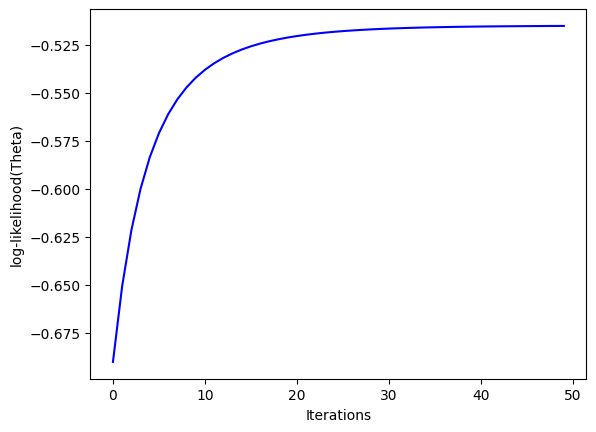

In [11]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

(-2.4699595998040142, 2.5803777103306857)

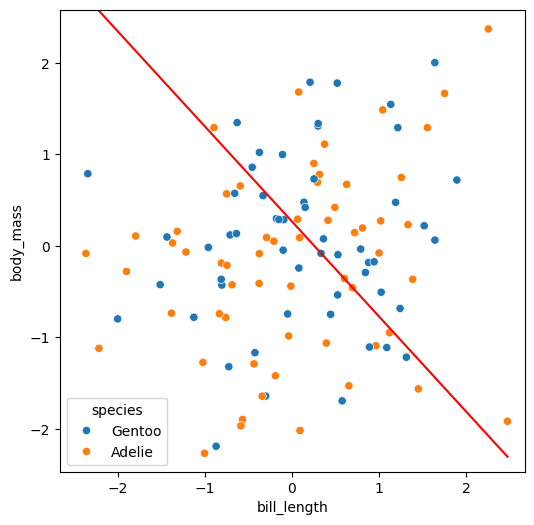

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [13]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule?
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?


-------------------------------------------------------

**1. Local Minimum or Maximum:**

We are seeking a *local maximum* using the gradient ascent rule.  Gradient ascent iteratively updates model parameters to increase the log-likelihood, aiming for a peak (maximum) in the parameter space.

**2. Gradient Descent vs. Gradient Ascent:**

While gradient ascent was used to maximize the log-likelihood, gradient descent could also have been employed.  Gradient descent minimizes a function, whereas gradient ascent maximizes one.  Maximizing the log-likelihood is equivalent to minimizing the *negative* log-likelihood (which is a common loss function).  Therefore, gradient descent could minimize the negative log-likelihood, reaching the same optimal parameters. The key difference would lie in the interpretation and the update rule.

**3. Effect of Learning Rate (α) and Number of Iterations:**

The learning rate (α) and number of iterations significantly influence the results:

* **Learning Rate (α):** A smaller α leads to slower convergence but potentially a more accurate solution, allowing for finer adjustments during gradient ascent.  A larger α can speed up convergence, but it risks overshooting the optimal point, causing oscillations and potentially preventing convergence.  An excessively large α may even lead to divergence.

* **Number of Iterations:** Sufficient iterations are needed to reach (or approximate) the maximum likelihood. Too few iterations result in an underfit model, failing to converge to the optimal parameters. While excessive iterations don't inherently harm model optimization, they increase computational cost unnecessarily.

These parameters impact the decision boundary: poorly chosen learning rates (too large) or insufficient iterations prevent the model from converging to a solution that effectively separates the data.

**4. Effect of Data Normalization:**

Failure to normalize the data allows features with larger scales to dominate the optimization process, leading to suboptimal results.  This is because gradient ascent is sensitive to feature magnitudes.  Without normalization, some features exert a disproportionate influence on the log-likelihood gradient, hindering convergence and producing a suboptimal decision boundary. Data normalization ensures that all features contribute equally, improving the model's fit and potentially increasing accuracy.

-------------------------------------------------------


## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression**

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$).
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

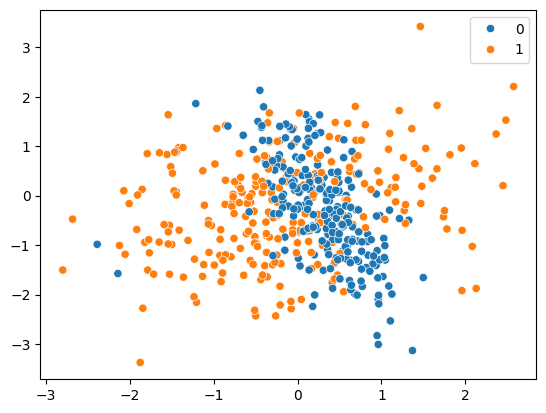

In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [15]:
import numpy as np

def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:
        X: the final polynomial features
    """
    if degree < 2:
        return X

    n_samples = X.shape[0]
    num_initial_features = X.shape[1]

    # Initialize the feature matrix.  The first column is always the bias term (ones).
    features = np.ones((n_samples, 1))

    # Iterate through the initial features (excluding the bias)
    for i in range(1, num_initial_features):
        for d in range(1, degree + 1):
            new_feature = X[:, i]**d
            features = np.column_stack((features, new_feature))

    # Add interaction terms (e.g., x1*x2, x1*x1*x2, etc.)
    for d in range(2, degree + 1):
        for c in range(1, d): # Iterate through combinations of powers
             for i in range(1, num_initial_features):
                 for j in range(i+1, num_initial_features): #Avoid duplicate combinations like x1^2*x2 and x2*x1^2
                    new_feature = (X[:,i]**(d-c))*(X[:,j]**c)
                    features = np.column_stack((features, new_feature))


    return features



**Do not write below this line just run it**

--------------------------------------------

In [16]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

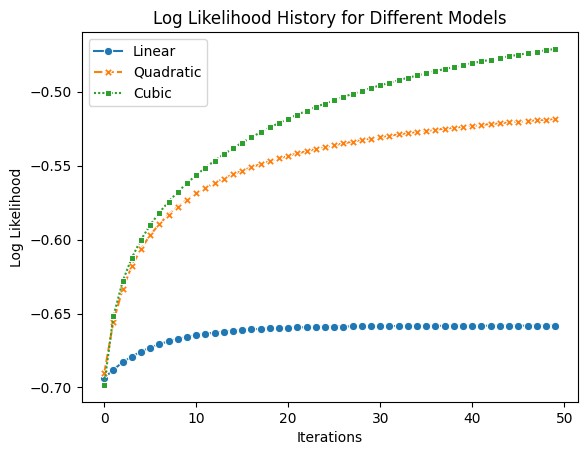

In [17]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary**

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [18]:
import numpy as np

def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """

    x1_vec, x2_vec = np.meshgrid(x1_vec, x2_vec)

    # Create feature matrix
    X_flat = np.column_stack((np.ones(x1_vec.size), x1_vec.ravel(), x2_vec.ravel()))

    # Apply polynomial transformation
    poly_features = get_polynomial(X_flat, degree)

    # Compute boundary function using np.dot
    f = np.dot(poly_features, theta_final)

    return x1_vec, x2_vec, f


Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

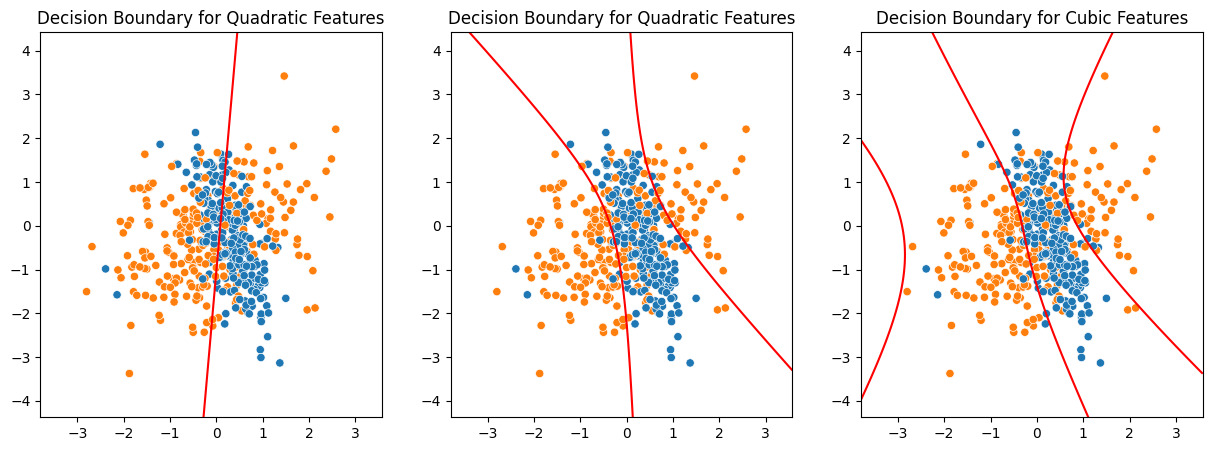

In [19]:
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [20]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    X = normalize(X)
    X_test = normalize(X_test)

    thetas = []
    accuracy_scores_train, accuracy_scores_test = [], []
    for degree in tqdm(degrees):
        x_new = get_polynomial(X, degree=degree)

        model = architecture(num_features=x_new.shape[1])
        fit(model, x_new, y, lr=lr, num_steps=num_steps)

        thetas.append(model.parameters)
        y_hat_train = model.predict(x_new) > 0.5
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))

    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:00<00:00, 28.35it/s]


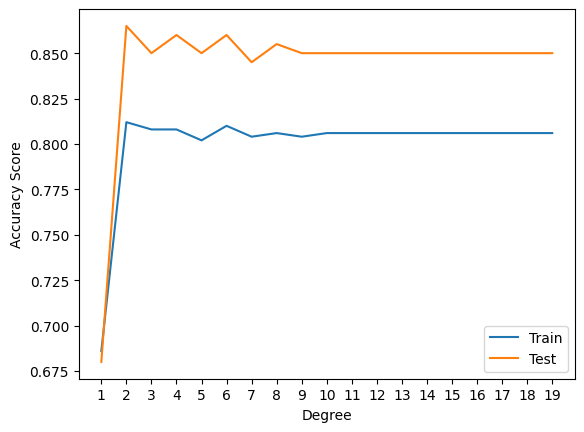

In [21]:
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()

Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

Text(0.5, 1.0, 'Worst Model (Degree 7)')

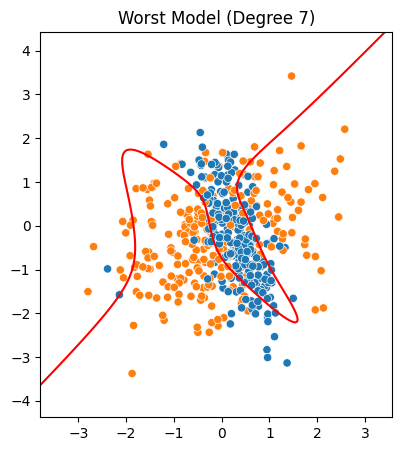

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

worst_degree_index = accuracy_scores_test.index(min(accuracy_scores_test[1:]))

# Plot worst model
plt.figure(figsize=(10, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)
plot_boundary_function(X, y, thetas[worst_degree_index], degree=degrees[worst_degree_index])
plt.title(f"Worst Model (Degree {degrees[worst_degree_index]})")


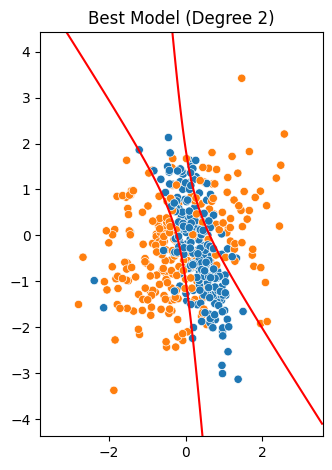

In [34]:
best_degree_index = accuracy_scores_test.index(max(accuracy_scores_test[1:]))

# Plot best model
plt.subplot(1, 2, 2)
plot_boundary_function(X, y, thetas[best_degree_index], degree=degrees[best_degree_index])
plt.title(f"Best Model (Degree {degrees[best_degree_index]})")

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()


#### **Report**
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer.
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


-------------------------------------------------------
1. **Observations from the Plots: Linear, Quadratic, and Cubic Decision Boundaries**

   Reviewing the generated decision boundary plots, it is evident that increasing the degree of the polynomial enhances the model's flexibility:
   - **Linear Model**: The decision boundary is a straight line.The model lacks the capacity to separate data points effectively in non-linear distributions.
   - **Quadratic Model**: The boundary becomes curved, allowing for more accurate separation of classes. This reduces underfitting compared to the linear model and demonstrates the benefits of incorporating additional flexibility.
   - **Cubic Model**: The boundary further adapts to the data, capturing even finer patterns. However, this added complexity risks overfitting, as the model may begin to capture noise or specific idiosyncrasies in the training data.

   While increasing the degree initially improves performance by better modeling the data distribution, excessively high degrees can lead to overfitting rather than underfitting. The model may lose its ability to generalize and instead focus too narrowly on the training data.

2. **Training and Test Accuracy Across Polynomial Degrees**

   Observing the accuracy plots for training and testing:
   - **Training Accuracy**: This generally increases with the polynomial degree, as the model becomes more flexible and adapts to the training data.
   - **Test Accuracy**: After an initial improvement, test accuracy often plateaus or declines as the degree increases, signaling overfitting. The model starts capturing noise from the training set, which degrades its performance on unseen data.

   The notebook plots training and testing accuracy as a function of the polynomial degree (1 to 20).  This clearly demonstrates the overfitting phenomenon:

   - **Low Degrees (e.g., 1):** Both training and test accuracy are relatively low, indicating underfitting – the model is too simple to capture the underlying data structure.
   - **Medium Degrees (e.g., 2-6):** Training and test accuracy increase, with a relatively small gap between the two. This suggests that the model is generalizing well. The best model is likely among this group.
   - **High Degrees (e.g., 7-20):** Training accuracy continues to increase, but test accuracy plateaus or even decreases significantly. This is a hallmark of overfitting: the model learns the training data's noise too well and performs poorly on new, unseen data.

   The best performance in terms of test accuracy is found at a degree around 2 (or potentially a very slightly higher degree, depending on the specific random seed and data split). The worst performance shows up in the high polynomial degree models, where the model starts significantly overfitting.

3. **Dataset Properties That Increase Overfitting Risk**

   Several properties of datasets make them more prone to overfitting:
   - **Noisy Data**: Models can mistakenly learn noise as meaningful patterns, leading to complex and unstable decision boundaries.
   - **Small Dataset Size**: Limited data prevents the model from observing diverse patterns, causing it to memorize specific examples rather than generalizing well.
   - **Imbalanced Classes**: A significant imbalance in class distribution can bias the model toward the majority class, neglecting the minority class. This diminishes the model's generalizability and leads to poor performance on less-represented classes.
-------------------------------------------------------


### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization.

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [37]:
from libs.models import LogisticRegressionPenalized

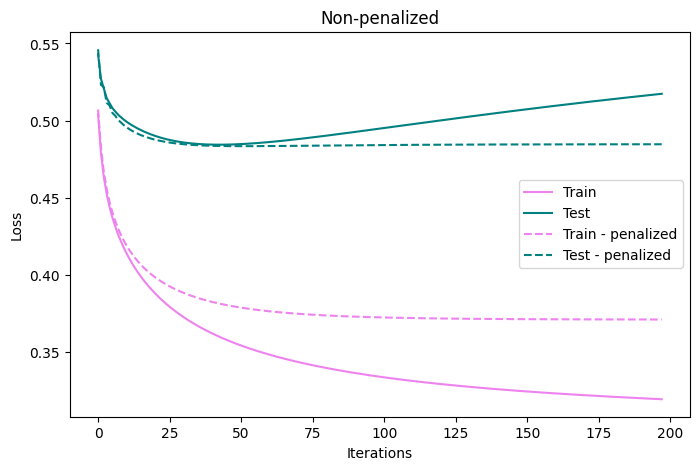

In [ ]:
X,y = make_classification(
    n_samples=500,
    n_features=100,
    n_informative=50,
    n_redundant=25,
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
np.random.seed(42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best:

Best lambda: 1.4000000000000001


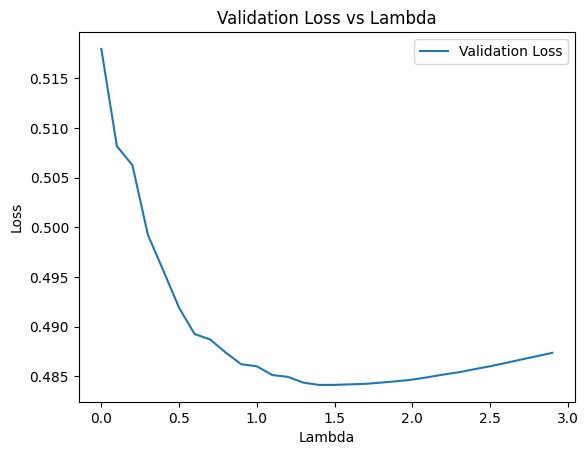

In [41]:
import numpy as np
import seaborn as sns
from libs.models import LogisticRegressionPenalized # Assuming this is your custom class
from libs.optim import fit # Assuming this is your fitting function

lambdas = np.arange(0, 3, 0.1)
losses = []

for lambda_ in lambdas:
    # Create a new instance of the penalized logistic regression model
    penalized_model = LogisticRegressionPenalized(X.shape[1], lambda_)

    # Train the model and track the history of losses
    training_loss, validation_loss = fit(
        penalized_model, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200
    )

    # Append the final validation loss to the losses list
    losses.append(validation_loss[-1])

if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]}")


#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?

-------------------------------------------------------

1. **Non-Penalized Logistic Regression**

   When using a non-penalized logistic regression model, the absence of regularization allows the weights to grow arbitrarily large in an attempt to fit the training data as closely as possible. This can result in:
   - **Overfitting**: The model becomes overly complex, capturing noise or irrelevant patterns in the training data, which hinders its ability to generalize to unseen data.
   - **Instability**: High sensitivity to small changes in the data, making the model less robust and prone to poor performance on the validation set.

2. **Train and Validation Losses: Penalized vs Non-Penalized Cases**

   The plot for the penalized model (with the best lambda of 1.5) compared against the non-penalized model reveals:

   - **Training Loss**: The training loss in the penalized model is higher than in the non-penalized model. This is expected because the L2 penalty term added to the loss function restricts the model's ability to fit the training data perfectly. It constrains the magnitude of the model's weights, preventing them from becoming excessively large. Overly large weights often indicate overfitting.

   - **Validation Loss**: This is where the benefit of L2 regularization becomes evident. The validation loss for the penalized model is significantly lower than for the non-penalized model, particularly after the point where the non-penalized validation loss starts to increase. This demonstrates that L2 regularization successfully prevents overfitting. By reducing the complexity of the model, it improves the generalization capability on new, unseen data.

   - **Lambda Selection and the Validation Loss Curve**: The optimal lambda value (λ = 1.5) was determined by analyzing the validation loss across a range of lambda values.  The validation loss versus lambda plot shows a U-shaped curve.  This illustrates the trade-off inherent in regularization:

    - Low λ:  Minimal regularization; validation loss is high due to overfitting, similar to the non-penalized case.
    - Increasing λ: Stronger regularization; validation loss decreases as overfitting is reduced.
    - High λ: Excessive regularization; validation loss increases due to underfitting, as the model's flexibility is overly constrained.

   The optimal lambda, corresponding to the minimum point on the curve, represents the best balance between model complexity and generalization performance.

3. **Convergence Rate and Influence of Penalization**

   The convergence rate refers to how quickly the loss function decreases during the training process. Visually comparing the plots, we can see:

   - **Convergence Rate**: The convergence rate appears faster for the non-penalized model initially. This is because the model is less constrained and can find a minimum loss in the training data quicker.

   - **Influence of Penalization**: However, the penalized model eventually achieves a lower validation loss, demonstrating that the slower, more controlled convergence associated with regularization ultimately yields a better model in terms of generalization performance. The penalty term introduces a trade-off: slower initial convergence for improved long-term generalization. The overall convergence is slower with regularization but leads to a more robust and less overfit solution.

-------------------------------------------------------


## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K.
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*.
In the first of this exercise we have to:
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) = -\sum_{i}^{N}y^{i}\log p{_i}
\end{align*}
where
\begin{align*}
p{_i}=[p_i{_1}, p_i{_2},...,p_i{_k},...,p_i{_K}]
\end{align*}

---
\\
\begin{align*}
Loss(\theta) = -\sum_{i}^{N}\sum_{k}^{K}y_k^{i}\log p{_i}_{k}
\end{align*}

---
\\
\begin{align*}
\nabla_{\theta_k} L(\theta) = \frac{\partial L(\theta)}{\partial \theta_k}= -\sum_{i=1}^{N}  y_k^i \frac{\partial}{\partial \theta_k} \Big(\log p_{ik} \Big)
\end{align*}

Using the chain rule, the derivative of $ \log p_{ik}$ is:

\begin{align*}
\\
\frac{\partial \log p_{ik}}{\partial \theta_k} = \frac{1}{p_{ik}} \cdot \frac{\partial p_{ik}}{\partial \theta_k}
\end{align*}

Now, we compute $\frac{\partial p_{ik}}{\partial \theta_k}$. The Softmax function is:
\begin{align}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^{K} \exp(X_i \theta_j)}
\end{align}


Case1: For $ k = k'$,
$\frac{\partial p_{ik}}{\partial \theta_k} = p_{ik} \big( 1 - p_{ik} \big) X_i$

Case 2: For $k \neq k'$,
$\frac{\partial p_{ij}}{\partial \theta_k} = -p_{ik} p_{ij} X_i$

We can now substitute the derivative of $\log p_{ik}$ into the sum:
\begin{align}
\nabla_{\theta_k} L(\theta) = -\sum_{i=1}^{N} y_k^i \cdot \frac{1}{p_{ik}} \cdot \frac{\partial p_{ik}}{\partial \theta_k}
\end{align}

Using the result for $\frac{\partial p_{ik}}{\partial \theta_k}$, we get:
\begin{align}
\nabla_{\theta_k} L(\theta) = \sum_{i=1}^{N} \big( p_{ik} - y_k^i \big) X_i
\end{align}



### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [2]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [3]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [7]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 10.00%
Test accuracy: 10.00%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [8]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [9]:
numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define the transformers for numerical and categorical columns

# Numerical transformer
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),            # Impute missing values with mean
    PolynomialFeatures(degree=3, include_bias=False),  # Add 3rd degree polynomial features
    StandardScaler()                           # Scale features to mean 0, std 1
)

# Categorical transformer
categoric_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),   # Impute missing values with most frequent value
    OneHotEncoder(handle_unknown='ignore')    # One-hot encode the categorical features
)

# Step 2: Create the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),  # Apply numeric_transformer to numerical_cols
    ('cat', categoric_transformer, categorical_cols)  # Apply categoric_transformer to categorical_cols
], remainder='drop')  # Drop any columns not specified in numerical_cols or categorical_cols

# Step 3: Build the pipeline
pipe = make_pipeline(
    preprocessor,                  # Add preprocessor to the pipeline
    KNeighborsClassifier()         # Add the classifier of your choice
)

# Display the pipeline if it has any steps
if len(pipe.named_steps) > 0:
    display(pipe)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [11]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.68      0.75      0.71        20
   Chinstrap       0.80      0.44      0.57         9
      Gentoo       0.57      0.67      0.62        12

    accuracy                           0.66        41
   macro avg       0.68      0.62      0.63        41
weighted avg       0.68      0.66      0.65        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters:

In [12]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__num__polynomialfeatures__degree: 3
columntransformer__num__polynomialfeatures__order: C
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: ignore
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 5
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [13]:
for param in pipe.get_params().keys():
    print(param)

memory
steps
verbose
columntransformer
kneighborsclassifier
columntransformer__force_int_remainder_cols
columntransformer__n_jobs
columntransformer__remainder
columntransformer__sparse_threshold
columntransformer__transformer_weights
columntransformer__transformers
columntransformer__verbose
columntransformer__verbose_feature_names_out
columntransformer__num
columntransformer__cat
columntransformer__num__memory
columntransformer__num__steps
columntransformer__num__verbose
columntransformer__num__simpleimputer
columntransformer__num__polynomialfeatures
columntransformer__num__standardscaler
columntransformer__num__simpleimputer__add_indicator
columntransformer__num__simpleimputer__copy
columntransformer__num__simpleimputer__fill_value
columntransformer__num__simpleimputer__keep_empty_features
columntransformer__num__simpleimputer__missing_values
columntransformer__num__simpleimputer__strategy
columntransformer__num__polynomialfeatures__degree
columntransformer__num__polynomialfeatures__

In [ ]:
from sklearn.model_selection import GridSearchCV

# Now we define the grid of hyperparameters
grid = {
    'kneighborsclassifier__n_neighbors': [9,11,13],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'columntransformer__num__polynomialfeatures__degree': [1,2]
}

# We create the GridSearchCV instance
pipe_cv = GridSearchCV(pipe, grid, cv=5, scoring='accuracy', verbose=1)

# Finally we can fit the GridSearchCV to the training data
pipe_cv.fit(X_train, y_train)
if pipe_cv is not None:
    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.7765151515151516
columntransformer__num__polynomialfeatures__degree: 1
kneighborsclassifier__n_neighbors: 11
kneighborsclassifier__weights: uniform


`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [18]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.88      0.70      0.78        20
   Chinstrap       0.70      0.78      0.74         9
      Gentoo       0.80      1.00      0.89        12

    accuracy                           0.80        41
   macro avg       0.79      0.83      0.80        41
weighted avg       0.81      0.80      0.80        41



#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

In [ ]:
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

##############################################
###                YOUR CODE HERE         ####
##############################################

--------------------------------------------

**Write your answer below this line**

1.
2.
3.
4.
5.

--------------------------------------------

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [4]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [5]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Calculate the size for the training set and validation set
# 80% for training, 20% for validation
train_size = int(0.8 * len(full_train_dataset))  # 80% of the data goes to training
val_size = len(full_train_dataset) - train_size  # The remaining 20% goes to validation

# Split the training dataset into training set and validation set
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Create DataLoaders for training, validation, and test
# DataLoader is responsible for loading the data in batches for the model
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Loads the training data with a batch size of 64, shuffling the data
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)    # Loads the validation data with a batch size of 64, without shuffling
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)   # Loads the test data with a batch size of 64, without shuffling

# Print the sizes of the datasets to verify the split
print(f"Training dataset size: {len(train_dataset)}")  # Print the size of the training dataset
print(f"Validation dataset size: {len(val_dataset)}")  # Print the size of the validation dataset
print(f"Test dataset size: {len(test_dataset)}")  # Print the size of the test dataset


Files already downloaded and verified
Files already downloaded and verified
Training dataset size: 40000
Validation dataset size: 10000
Test dataset size: 10000


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [2]:
import os
import sys

from libs.models.poor_cnn import CorrectedCNN

net= CorrectedCNN()
print(net)

CorrectedCNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (fc1): Linear(in_features=64, out_features=10, bias=True)
)


Loss Function and optimizer

In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [8]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    _, y_pred = torch.max(outputs, 1)  # Get predicted class indices
    correct_train = (y_pred == labels).sum().item()
    train_accuracy = correct_train / labels.size(0)  # Accuracy = correct predictions / total
    train_accuracies.append(train_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()

    #####################################################
    ##              YOUR CODE HERE                     ##
    #####################################################

    # Calculate average loss for the validation epoch
    avg_val_loss = val_running_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Calculate validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    #####################################################
    ##              END OF YOUR CODE                   ##
    #####################################################

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 1.8535, Training Accuracy: 0.5000
Epoch 1, Average Validation Loss: 1.6787, Validation Accuracy: 0.3936
Epoch 2, Average Training Loss: 1.6196, Training Accuracy: 0.4062
Epoch 2, Average Validation Loss: 1.5628, Validation Accuracy: 0.4406
Epoch 3, Average Training Loss: 1.5186, Training Accuracy: 0.5156
Epoch 3, Average Validation Loss: 1.4860, Validation Accuracy: 0.4666
Epoch 4, Average Training Loss: 1.4506, Training Accuracy: 0.4844
Epoch 4, Average Validation Loss: 1.4422, Validation Accuracy: 0.4820
Epoch 5, Average Training Loss: 1.4060, Training Accuracy: 0.4844
Epoch 5, Average Validation Loss: 1.4285, Validation Accuracy: 0.4906
Epoch 6, Average Training Loss: 1.3782, Training Accuracy: 0.5781
Epoch 6, Average Validation Loss: 1.3723, Validation Accuracy: 0.5147
Epoch 7, Average Training Loss: 1.3540, Training Accuracy: 0.5781
Epoch 7, Average Validation Loss: 1.3707, Validation Accuracy: 0.5145
Epoch 8, Average Training Loss: 1.3337, Training

### 4.4: Evaluate

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        #####################################################
        ##              YOUR CODE HERE                     ##
        #####################################################

        total += labels.size(0)  # Aggiungi il numero di immagini nel batch
        correct += (predicted == labels).sum().item()  # Aggiungi il numero di predizioni corrette

        #####################################################
        ##              END OF YOUR CODE                   ##
        #####################################################

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')


Accuracy on the test images: 53.09%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 and imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------



### Report

#### 1. What challenges can class imbalance introduce when training a machine learning model?

Class imbalance occurs when certain classes in a dataset have significantly more samples than others. This can introduce several challenges when training machine learning models:

- **Bias towards majority classes**: The model might become biased towards predicting the majority class because it sees those classes more frequently during training.
- **Poor generalization for minority classes**: The model may struggle to learn meaningful features for the minority class due to insufficient training examples.
- **Reduced model performance**: The overall accuracy can be misleading, as a model could achieve high accuracy by simply predicting the majority class most of the time, while performing poorly on the minority class.

#### 2. What are some strategies to address class imbalance in your dataset or training process?

Several strategies can be applied to deal with class imbalance:

- **Resampling methods**:
  - **Oversampling**: Increasing the number of minority class samples by duplicating or generating synthetic examples (e.g., SMOTE).
  - **Undersampling**: Reducing the number of majority class samples by randomly removing examples from the majority class.
  
- **Class weights**: Assign higher weights to minority classes during model training, making it more costly for the model to misclassify them.
  
- **Data augmentation**: Generate new, augmented examples for the minority class, such as through transformations like rotation or flipping.

#### 3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance?

Accuracy alone can be misleading in imbalanced datasets because it does not account for the distribution of classes. For example, in a dataset with 90% of one class and only 10% of another, a model that predicts only the majority class will have high accuracy (90%), even though it fails to predict the minority class at all. Therefore, accuracy does not provide a complete picture of a model's performance, and other metrics like precision, recall, and F1-score are more informative in such cases.

#### 4. Is the CIFAR-10 dataset an imbalanced dataset? Plot the number of samples for each class in the CIFAR-10 dataset.

The CIFAR-10 dataset contains 10 classes, each with 6,000 images (for a total of 60,000 images). Therefore, it is **not considered an imbalanced dataset**, as each class has the same number of samples.


-------------------------------------------------------
-------------------------------------------------------

Files already downloaded and verified


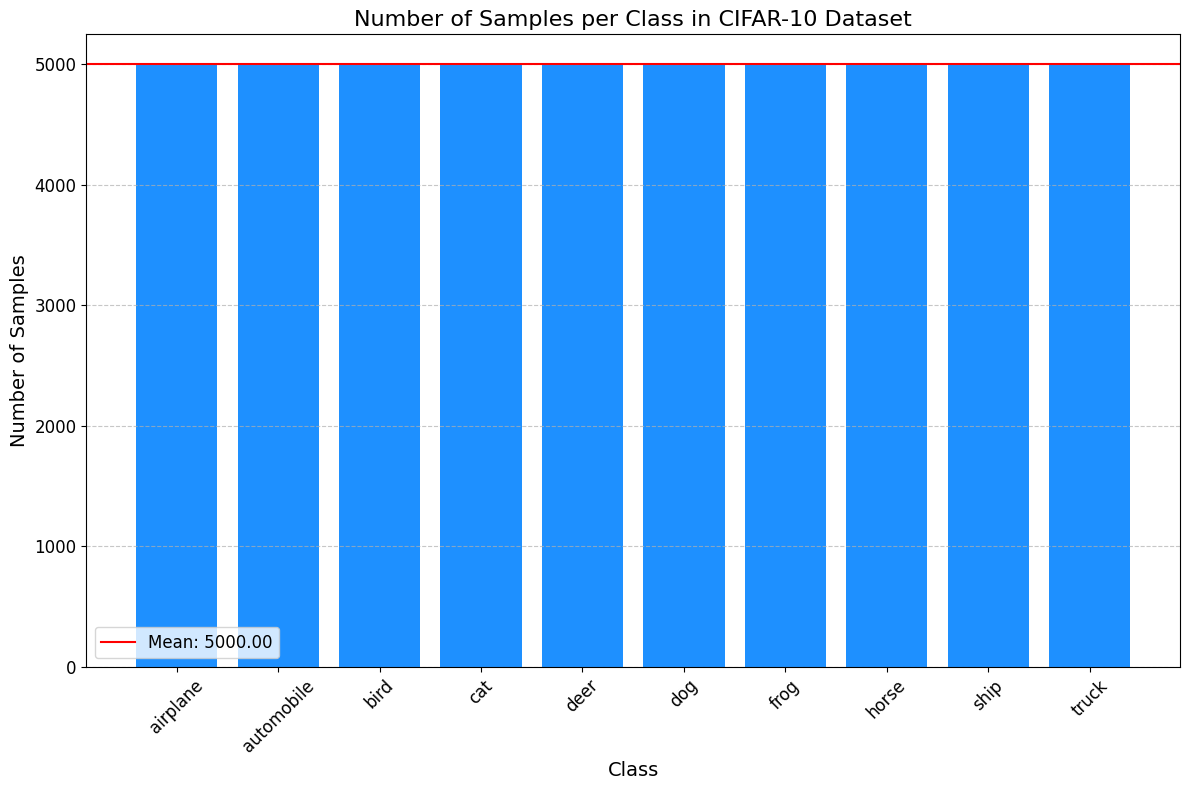

In [10]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from collections import Counter
import numpy as np

# Load the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get the class labels
labels = [label for _, label in trainset]

# Count the occurrences of each class label
class_counts = Counter(labels)

# Calculate the mean number of samples per class
mean_samples = np.mean(list(class_counts.values()))

# Plot the number of samples per class
plt.figure(figsize=(12, 8))  # Increase the figure size
plt.bar(class_counts.keys(), class_counts.values(), color='dodgerblue')  # Use a more visible color
plt.xlabel('Class', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Number of Samples', fontsize=14)  # Increase font size for y-axis label
plt.title('Number of Samples per Class in CIFAR-10 Dataset', fontsize=16)  # Increase font size for title
plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=45, fontsize=12)  # Rotate labels and adjust font size
plt.yticks(fontsize=12)  # Increase font size for y-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for easier reading

# Add a line for the mean number of samples
plt.axhline(y=mean_samples, color='red', linestyle='-', label=f'Mean: {mean_samples:.2f}')
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to make it cleaner
plt.show()


## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [12]:
from libs.models.custom_cnn import CustomCNN

net = CustomCNN().to(device)

#### Training

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


Epoch 1, Loss: 1.4185
Epoch 2, Loss: 1.0540
Epoch 3, Loss: 0.9196
Epoch 4, Loss: 0.8346
Epoch 5, Loss: 0.7711
Epoch 6, Loss: 0.7238
Epoch 7, Loss: 0.6883
Epoch 8, Loss: 0.6545
Epoch 9, Loss: 0.6317
Epoch 10, Loss: 0.5999
Finished Training


#### Evaluation

In [14]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 72.17%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [22]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch
import torchvision
import torch.nn as nn

model = torchvision.models.alexnet(pretrained=True)



model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)


for param in model.parameters():
    param.requires_grad = False 
for param in model.classifier[6].parameters():
    param.requires_grad = True  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(model)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/var/folders/ws/ykjsjk1s5sv753b9d9vxpl9m0000gp/T/ipykernel_5571/2610020987.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Questo ti dirà se è la CPU o la GPU
model.to(device)  # Sposta il modello sulla GPU (se disponibile)


Using device: cpu


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        print(f'Epoch {epoch + 1}, Batch {i}')
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Epoch 1, Batch 0
Epoch 1, Batch 1
Epoch 1, Batch 2
Epoch 1, Batch 3
Epoch 1, Batch 4
Epoch 1, Batch 5
Epoch 1, Batch 6
Epoch 1, Batch 7
Epoch 1, Batch 8
Epoch 1, Batch 9
Epoch 1, Batch 10
Epoch 1, Batch 11
Epoch 1, Batch 12
Epoch 1, Batch 13
Epoch 1, Batch 14
Epoch 1, Batch 15
Epoch 1, Batch 16
Epoch 1, Batch 17
Epoch 1, Batch 18
Epoch 1, Batch 19
Epoch 1, Batch 20
Epoch 1, Batch 21
Epoch 1, Batch 22
Epoch 1, Batch 23
Epoch 1, Batch 24
Epoch 1, Batch 25
Epoch 1, Batch 26
Epoch 1, Batch 27
Epoch 1, Batch 28
Epoch 1, Batch 29
Epoch 1, Batch 30
Epoch 1, Batch 31
Epoch 1, Batch 32
Epoch 1, Batch 33
Epoch 1, Batch 34
Epoch 1, Batch 35
Epoch 1, Batch 36
Epoch 1, Batch 37
Epoch 1, Batch 38
Epoch 1, Batch 39
Epoch 1, Batch 40
Epoch 1, Batch 41
Epoch 1, Batch 42
Epoch 1, Batch 43
Epoch 1, Batch 44
Epoch 1, Batch 45
Epoch 1, Batch 46
Epoch 1, Batch 47
Epoch 1, Batch 48
Epoch 1, Batch 49
Epoch 1, Batch 50
Epoch 1, Batch 51
Epoch 1, Batch 52
Epoch 1, Batch 53
Epoch 1, Batch 54
Epoch 1, Batch 55
Ep